In [68]:
import numpy as np
import sympy as sp
from sympy import symbols, Eq, solve, init_printing, simplify, Function, Matrix
import time
sp.init_printing()

import kinpy as kp
from kinpy import calc_jacobian

In [85]:
chain = kp.build_serial_chain_from_urdf(open("sawyer.urdf").read(), 'right_l6')
print(chain)
print(chain.get_joint_parameter_names())

th = [0.0, np.deg2rad(-90), 0.0, np.deg2rad(90), 0.0, np.deg2rad(90), 0.0]
jac = chain.jacobian(th)
print(jac)
inv_jac = np.linalg.pinv(jac)

print(inv_jac.shape)

joint_vel = inv_jac@np.array([0.0,-0.01,0.0,0.0,0.0,0.0]).reshape(-1,1)
print(joint_vel.flatten())

base_frame
 	controller_box_frame
 	pedestal_feet_frame
 	pedestal_frame
 	right_arm_base_link_frame
 	 	right_l0_frame
 	 	 	head_frame
 	 	 	 	screen_frame
 	 	 	 	head_camera_frame
 	 	 	right_torso_itb_frame
 	 	 	right_l1_frame
 	 	 	 	right_l2_frame
 	 	 	 	 	right_l3_frame
 	 	 	 	 	 	right_l4_frame
 	 	 	 	 	 	 	right_arm_itb_frame
 	 	 	 	 	 	 	right_l5_frame
 	 	 	 	 	 	 	 	right_hand_camera_frame
 	 	 	 	 	 	 	 	right_wrist_frame
 	 	 	 	 	 	 	 	right_l6_frame
 	 	 	 	 	 	 	 	 	right_hand_frame
 	 	 	 	 	 	 	right_l4_2_frame
 	 	 	 	 	right_l2_2_frame
 	 	 	 	right_l1_2_frame
 	torso_frame

['right_j0', 'right_j1', 'right_j2', 'right_j3', 'right_j4', 'right_j5', 'right_j6']
[[-1.60300000e-01  2.90000000e-01  3.22000000e-02 -1.10000000e-01
  -6.67404410e-13 -1.10000000e-01  0.00000000e+00]
 [ 4.81000000e-01 -1.42002231e-12  4.00000000e-01  5.38678914e-13
   1.10000000e-01  5.38644876e-13  0.00000000e+00]
 [ 2.40544368e-16 -4.00000000e-01 -1.80089963e-12 -4.00000000e-01
   1.3

In [58]:
# b = np.deg2rad(60)

# total_length = 0.53375 + 0.4*np.cos(np.deg2rad(45))

# a = -np.arccos((total_length - 0.53375*np.cos(np.deg2rad(45) - b))/(0.4))

# print('a', np.rad2deg(a))

# c = np.deg2rad(45) + b

# print('c', np.rad2deg(c))

In [59]:

# L1 = 0.4
# L4 = (126.5 + 273.5)/1000


# max_height = 0.4-0.13375
# min_heigth = -(0.4+0.13375)


# a, b, h, l, xc, yc = symbols('a b h l xc yc')
# eqn1 = Eq(L1**2 + L4**2 - 2*L1*L4*sp.cos(b), xc**2 + yc**2)


# eqn2 = Eq((xc**2 + yc**2)**2 + L1**2 - 2*(xc**2 + yc**2)*L1*sp.cos(a-sp.atan2(yc,xc)), L4**2)

In [60]:
# sol_b = sol_b.subs(xc, 0.4)
# sol_b

# sol_a = sol_a.subs(xc, 0.4)
# sol_a

In [61]:
# sol_b = sol_b.subs(yc, 0.4)
# sol_b

# sol_a = sol_a.subs(yc, 0.4)

# print('a', 180 * sol_a / np.pi)
# print('b', 180 * sol_b / np.pi)

In [62]:
# xc = 0.4
# yc = 0.2

# h_sq = (xc**2) + (yc**2)
# b = np.arccos((h_sq - (L1**2) - (L4**2))/ (2*L1*L4))
# print('b', 180 * b / np.pi)



# a = -(np.arccos((L4**2 - h_sq - L1**2)/(-2*np.sqrt(h_sq)*L1)) + np.arctan2(yc,xc))
# print('a', 180 * a / np.pi)


# c = (-a) + np.deg2rad(90) - b
# print('c', 180 * c / np.pi)

In [63]:
# L1 = 0.4
# L4 = (126.5 + 273.5)/1000
# L6 = 0.13375


L1,L4,L6, t, dxe, dye, dphie, da, db, dc = symbols('L1 L4 L6 t dxe dye dphie da db dc')
a = Function('a')
b = Function('b')
c = Function('c')
xe = Function('xe')
ye = Function('ye')
phie = Function('phie')

eqnx = L1*sp.cos(-a(t)) + L4*sp.cos(-a(t)-b(t)) + L6*sp.cos(-a(t)-b(t)-c(t))
eqny = L1*sp.sin(-a(t)) + L4*sp.sin(-a(t)-b(t)) + L6*sp.sin(-a(t)-b(t)-c(t))
eqnphi = -a(t)-b(t)-c(t)

diff_eqnx = sp.diff(eqnx, t).simplify()


diff_eqny = sp.diff(eqny, t).simplify()



diff_eqnphi = sp.diff(eqnphi, t).simplify()


eqnx_lin = Eq(diff_eqnx, dxe)
eqny_lin = Eq(diff_eqny, dye)
eqnphi_lin = Eq(diff_eqnphi, dphie)

eqnx_lin = eqnx_lin.subs([(sp.diff(a(t),t), da), (sp.diff(b(t),t), db), (sp.diff(c(t),t), dc)])
eqny_lin = eqny_lin.subs([(sp.diff(a(t),t), da), (sp.diff(b(t),t), db), (sp.diff(c(t),t), dc)])
eqnphi_lin = eqnphi_lin.subs([(sp.diff(a(t),t), da), (sp.diff(b(t),t), db), (sp.diff(c(t),t), dc)])

jac, ee_vel = sp.linear_eq_to_matrix([eqnx_lin, eqny_lin, eqnphi_lin], [da, db, dc])

jac = Matrix(jac)

jac_sub = sp.lambdify([L1,L4,L6,a(t), b(t), c(t)], jac)
print(jac_sub(0.4,0.4,0.13375,np.deg2rad(-90),np.deg2rad(90),np.deg2rad(90)))

[[ 2.66250000e-01 -1.33750000e-01 -1.33750000e-01]
 [-4.00000000e-01 -4.00000000e-01 -8.18982547e-18]
 [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00]]
[[ 2.66250000e-01 -1.33750000e-01 -1.33750000e-01]
 [-4.00000000e-01 -4.00000000e-01 -8.18982547e-18]
 [-1.00000000e+00 -1.00000000e+00 -1.00000000e+00]]


In [64]:
import jax.numpy as np
from jax import jit, device_put


jac_sub = device_put(jac_sub)
#start = time.time()

inv_jac = np.linalg.pinv(jac_sub)

#end = time.time() - start

ee_vel_val = np.array([0.0, -0.5, 0.0]).reshape(-1,1)

joint_vel_val = inv_jac@ee_vel_val
print(joint_vel_val)
print(end)

1.66 ms ± 26.4 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
[[ 6.8140307e-16]
 [ 1.2500000e+00]
 [-1.2500000e+00]]
13.99718451499939


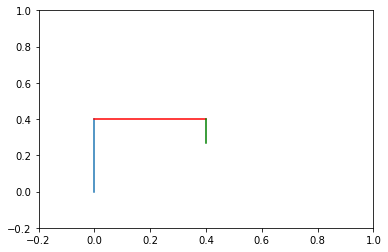

In [65]:
import matplotlib.pyplot as plt
def plot_arm(a_deg,b_deg,c_deg, l1,l4,l6):
    l1x = l1*np.cos(-a_deg)
    l1y = l1*np.sin(-a_deg)
    plt.plot([0,l1x],[0,l1y])
    
    l4x = l1*np.cos(-a_deg)+l4*np.cos(-a_deg - b_deg)
    l4y = l1*np.sin(-a_deg)+l4*np.sin(-a_deg - b_deg)
    plt.plot([l1x,l4x],[l1y,l4y], color='red')
    
    xe_val = l1*np.cos(-a_deg)+l4*np.cos(-a_deg - b_deg)+l6*np.cos(-a_deg-b_deg-c_deg)
    ye_val = l1*np.sin(-a_deg)+l4*np.sin(-a_deg - b_deg)+l6*np.sin(-a_deg-b_deg-c_deg)
    plt.plot([l4x,xe_val],[l4y,ye_val], color='green')
    
    plt.ylim([-0.2,1.0])
    plt.xlim([-0.2,1.0])
    plt.show()
    
    
plot_arm(np.deg2rad(-90), np.deg2rad(90), np.deg2rad(90), 0.4, 0.4, 0.13375)
    